In [3]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 13.86 MiB/s, done.
Resolving deltas: 100% (15/15), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [4]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [5]:
!unzip "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.zip"

unzip:  cannot find or open /content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.zip, /content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.zip.zip or /content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.zip.ZIP.


In [6]:
data_dir= "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [7]:
import os
filenames=[data_dir+filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [8]:
def get_lines(filename):
  with open(filename, 'r') as f:
    return f.readlines()

In [9]:
train_lines=get_lines(data_dir+"train.txt")
train_lines[:15]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [10]:
def preprocess_text_with_line_numbers(filename):
  input_lines=get_lines(filename)
  abstract_lines=""
  abstract_samples=[]

  for line in input_lines:
    if line.startswith("###"):
      abstract_id=line
      abstract_lines=""

    elif line.isspace():
      abstract_line_split=abstract_lines.splitlines()

      for abstract_line_number,abstract_line in enumerate(abstract_line_split):
        line_data={}
        target_text_split=abstract_line.split("\t")
        line_data["target"]=target_text_split[0]
        line_data["text"]=target_text_split[1].lower()
        line_data["line_number"]=abstract_line_number
        line_data["total_lines"]=len(abstract_line_split) - 1
        abstract_samples.append(line_data)
    else :
      abstract_lines +=line

  return abstract_samples

In [11]:
%%time
train_samples=preprocess_text_with_line_numbers(data_dir+"train.txt")
val_samples=preprocess_text_with_line_numbers(data_dir+"dev.txt")
test_samples=preprocess_text_with_line_numbers(data_dir+"test.txt")
print(len(train_samples), len(val_samples), len(test_samples))

180040 30212 30135
CPU times: user 380 ms, sys: 84.7 ms, total: 465 ms
Wall time: 465 ms


In [12]:
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [13]:
import pandas as pd
train_df=pd.DataFrame(train_samples)
val_df=pd.DataFrame(val_samples)
test_df=pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [14]:
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

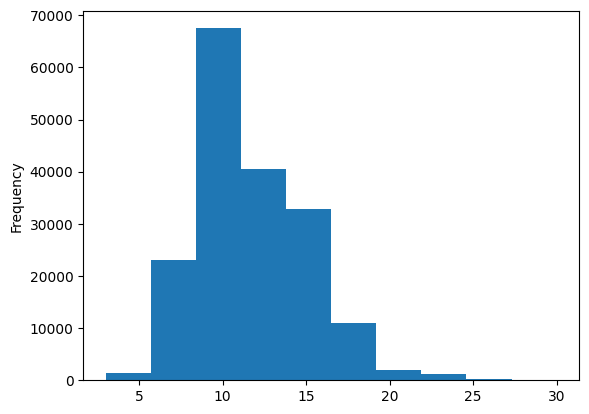

In [15]:
train_df.total_lines.plot.hist()

In [16]:
train_sentences=train_df["text"].tolist()
val_sentences=val_df["text"].tolist()
test_sentences=test_df["text"].tolist()
print(len(train_sentences), len(val_sentences), len(test_sentences))

180040 30212 30135


In [17]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(sparse=False)
train_labels_one_hot=one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot=one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot=one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))

train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded=label_encoder.transform(val_df["target"].to_numpy())
test_label_encoded=label_encoder.transform(test_df["target"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [19]:
num_classes=len(label_encoder.classes_)
class_names=label_encoder.classes_
num_classes,class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [20]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-05-24 11:33:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-24 11:33:10 (112 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [21]:
from helper_functions import calculate_results

In [22]:
import numpy as np
sent_lens=[len(sentence.split()) for sentence in train_sentences]
avg_sent_lens=np.mean(sent_lens)
avg_sent_lens

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

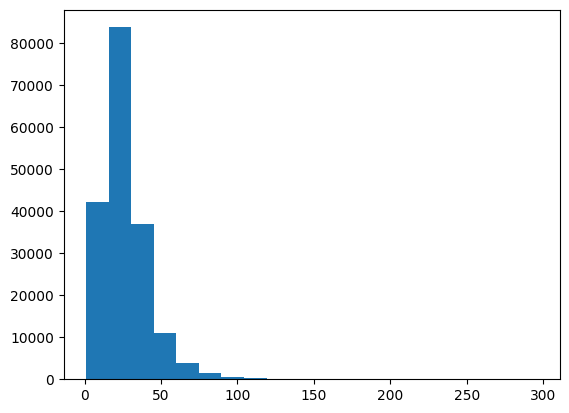

In [23]:
import matplotlib.pyplot as plt
plt.hist(sent_lens,bins=20)

In [24]:
output_sent_len=int(np.percentile(sent_lens,95))
output_sent_len

55

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

max_tokens=68000
output_seq_length=40

text_vectorizer=TextVectorization(max_tokens=max_tokens,
                                  output_sequence_length=output_seq_length)

In [26]:
text_vectorizer.adapt(train_sentences)

In [27]:
import random
random_sentence=random.choice(train_sentences)
print(f"Text:{random_sentence}\n\nVectorized form: ")
print(f"\n Length of Text: {len(random_sentence.split())}")
text_vectorizer([random_sentence])

Text:frequent refresher training and in situ simulation are promising interventions .

Vectorized form: 

 Length of Text: 11


<tf.Tensor: shape=(1, 40), dtype=int64, numpy=
array([[  938, 16652,   155,     3,     5,  3961,  1781,    58,  1382,
          265,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0]])>

In [28]:
rct_20k_text_vocab=text_vectorizer.get_vocabulary()
print(f"Number of words in vocacb:{len(rct_20k_text_vocab)}")
print(f"Most comman words :{rct_20k_text_vocab[:5]}")
print(f"Least comman words :{rct_20k_text_vocab[-5:]}")

Number of words in vocacb:64841
Most comman words :['', '[UNK]', 'the', 'and', 'of']
Least comman words :['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [29]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 40,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [30]:
from tensorflow.keras import layers
token_embed=layers.Embedding(input_dim=len(rct_20k_text_vocab),
                            output_dim=128,
                            mask_zero=True,
                            name="token_embedding",)

In [31]:
print(f"Before:\n {random_sentence}\n")
print(f"len: {len(random_sentence.split())}")
vectorized_sentence=text_vectorizer([random_sentence])
print(f"Vectorized:\n {vectorized_sentence}")
embeded_sentence=token_embed(vectorized_sentence)
print(f"Embeded:\n {embeded_sentence}")
print(f"Embeded shape: \n {embeded_sentence.shape}")

Before:
 frequent refresher training and in situ simulation are promising interventions .

len: 11
Vectorized:
 [[  938 16652   155     3     5  3961  1781    58  1382   265     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]]
Embeded:
 [[[-0.0240003   0.04884926  0.03831757 ...  0.01779181  0.03290815
    0.0215724 ]
  [ 0.02035678 -0.02065933  0.02589655 ...  0.02322111  0.03431365
   -0.02148   ]
  [ 0.0152866  -0.04315354 -0.02207757 ...  0.03722591  0.01211852
   -0.00396387]
  ...
  [-0.0285013   0.02361147  0.03132173 ...  0.00413926  0.0119986
    0.0072647 ]
  [-0.0285013   0.02361147  0.03132173 ...  0.00413926  0.0119986
    0.0072647 ]
  [-0.0285013   0.02361147  0.03132173 ...  0.00413926  0.0119986
    0.0072647 ]]]
Embeded shape: 
 (1, 40, 128)


In [32]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
valid_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [33]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                      trainable=False,
                                      name="universal_sentence_encoder")

In [34]:
random_train_sentence=random.choice(train_sentences)
print(f"Random sentnce:\n {random_train_sentence}")
use_embedded_sentence=tf_hub_embedding_layer([random_train_sentence])
print(f"Sentence after embedding:\n {use_embedded_sentence[0][:30]}")
print(f"Length of sentence embedding: {len(use_embedded_sentence[0])}")

Random sentnce:
 pre-treatment with prasugrel was not associated with decreases in any ischemic event , including total mortality .
Sentence after embedding:
 [ 0.01790117  0.03434876 -0.03681099 -0.05979044 -0.01223799 -0.05939645
  0.06489038 -0.03637915  0.08249465  0.06623088  0.0929068   0.06015782
 -0.00825969  0.0262402   0.02900528 -0.03067834 -0.07174267 -0.01592887
  0.00315109  0.04172569 -0.08345459  0.04266594 -0.03183121  0.00637509
  0.02919156  0.03234351  0.02228261 -0.01249843 -0.03259095  0.04561196]
Length of sentence embedding: 512


In [35]:
def split_chars(text):
  return " ".join(list(text))

split_chars(random_train_sentence)

'p r e - t r e a t m e n t   w i t h   p r a s u g r e l   w a s   n o t   a s s o c i a t e d   w i t h   d e c r e a s e s   i n   a n y   i s c h e m i c   e v e n t   ,   i n c l u d i n g   t o t a l   m o r t a l i t y   .'

In [36]:
train_chars=[split_chars(sentence) for sentence in train_sentences]
val_chars=[split_chars(sentence) for sentence in val_sentences]
test_chars=[split_chars(sentence) for sentence in test_sentences]
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [37]:
char_lens=[len(sentence) for sentence in train_sentences]
mean_char_len=np.mean(char_lens)
mean_char_len

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

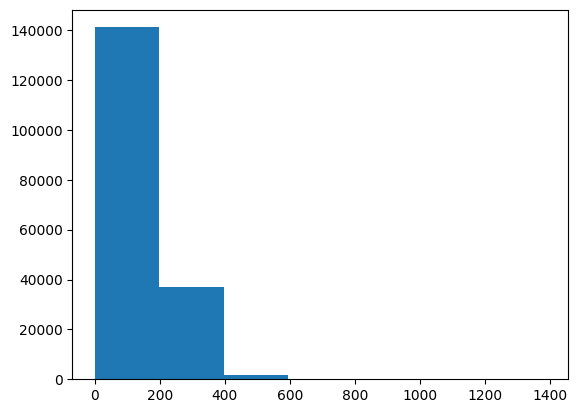

In [38]:
import matplotlib.pyplot as plt
plt.hist(char_lens,bins=7)

In [39]:
output_seq_char_len=int(np.percentile(char_lens,95))
output_seq_char_len

290

In [40]:
import string
alphabet=string.ascii_lowercase+string.digits+string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
NUM_CHAR_TOKENS=len(alphabet)+2
char_vectorizer=TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                  output_sequence_length=output_seq_char_len,
                                  name="char_vectorizer",
                                  standardize=None)

In [42]:
char_vectorizer.adapt(train_chars)

In [43]:
char_vocab=char_vectorizer.get_vocabulary()
print(f"num of diff char: {len(char_vocab)}")
print(f"5 common characters: {char_vocab[:5]}")
print(f"5 least common chars: {char_vocab[-5:]}")

num of diff char: 57
5 common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common chars: ['|', '"', ']', '\\', '[']


In [44]:
char_embed=layers.Embedding(input_dim=len(char_vocab),
                            output_dim=25, #according to research paper
                            mask_zero=True,
                            name="char_embed")

In [45]:
random_train_chars=random.choice(train_chars)
print(f"Charified Text:\n {random_train_chars}")
print(f"length of random_train_chars: \n {len(random_train_chars.split())}")
vectorizer_chars=char_vectorizer([random_train_chars])
print(f"\nVectorizer char: \n{vectorizer_chars}")
char_embed_example=char_embed(vectorizer_chars)
print(f"\n Embed char: \n {char_embed_example}")
print(f"\n Shape of embed char: \n {char_embed_example.shape}")

Charified Text:
 e l e v a t i o n s   i n   l i v e r   f u n c t i o n   t e s t s   o c c u r r e d   i n   @   %   o f   p a t i e n t s   .
length of random_train_chars: 
 53

Vectorizer char: 
[[ 2 12  2 22  5  3  4  7  6  9  4  6 12  4 22  2  8 17 16  6 11  3  4  7
   6  3  2  9  3  9  7 11 11 16  8  8  2 10  4  6 19 31  7 17 14  5  3  4
   2  6  3  9 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [46]:
train_char_dataset=tf.data.Dataset.from_tensor_slices((train_chars,train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset=tf.data.Dataset.from_tensor_slices((val_chars,val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset=tf.data.Dataset.from_tensor_slices((test_chars,test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [47]:
train_char_token_data=tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_char_token_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset=tf.data.Dataset.zip((train_char_token_data,train_char_token_labels))

train_char_token_dataset=train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [48]:
val_char_token_data=tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
val_char_token_labels=tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset=tf.data.Dataset.zip((val_char_token_data,val_char_token_labels))

val_char_token_dataset=val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [49]:
np.percentile(train_df.line_number,98)

15.0

In [50]:
train_line_number_one_hot=tf.one_hot(train_df["line_number"].to_numpy(),depth=15)
val_line_number_one_hot=tf.one_hot(val_df["line_number"].to_numpy(),depth=15)
test_line_number_one_hot=tf.one_hot(test_df["line_number"].to_numpy(),depth=15)

train_line_number_one_hot[:10], train_line_number_one_hot.shape

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 TensorShape([180040, 15]))

In [51]:
train_total_lines_one_hot=tf.one_hot(train_df["total_lines"].to_numpy(),depth=20)
val_total_lines_one_hot=tf.one_hot(val_df["total_lines"].to_numpy(),depth=20)
test_total_lines_one_hot=tf.one_hot(test_df["total_lines"].to_numpy(),depth=20)
train_total_lines_one_hot.shape,train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

In [52]:
token_inputs=layers.Input(shape=[],dtype=tf.string,name="token_inputs")
token_vectors=text_vectorizer(token_inputs)
token_embeddings=token_embed(token_vectors)
token_embeddings=layers.GlobalMaxPool1D()(token_embeddings)
token_outputs= layers.Dense(128,activation="relu")(token_embeddings)
token_model=tf.keras.Model(inputs=token_inputs,
                            outputs=token_outputs)

char_inputs=layers.Input(shape=(1,),dtype=tf.string,name="char_inputs")
char_vectors=char_vectorizer(char_inputs)
char_embeddings= char_embed(char_vectors)
char_bi_lstm= layers.Bidirectional(layers.LSTM(24,activation="tanh"))(char_embeddings)
char_model=tf.keras.Model(inputs=char_inputs,
                          outputs=char_bi_lstm)

line_numbers_inputs=layers.Input(shape=(15,),dtype="float32",name="line_numbers_inputs")
x=layers.Dense(32,activation="relu")(line_numbers_inputs)
line_numbers_model=tf.keras.Model(inputs=line_numbers_inputs,
                                  outputs=x)

total_lines_inputs=layers.Input(shape=(20,),dtype="float32",name="total_lines_inputs")
y=layers.Dense(32,activation="relu")(total_lines_inputs)
total_lines_model=tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

combined_embeddings=layers.Concatenate(name="char_token_hybrid_embdding")([token_model.output,
                                                                           char_model.output])

z=layers.Dense(256,activation="relu")(combined_embeddings)
z=layers.Dropout(0.5)(z)


tribrid_embeddings=layers.Concatenate(name="char_token_positional_mbedding")([line_numbers_model.output,
                                                                              total_lines_model.output,
                                                                              z])

output_layer=layers.Dense(num_classes,activation="softmax",name="output_layer")(tribrid_embeddings)

model_6=tf.keras.Model(inputs=[line_numbers_model.input,
                               total_lines_model.input,
                               token_model.input,
                               char_model.input],
                       outputs=output_layer,
                       name="tribrid_embedding_model")

In [53]:
model_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

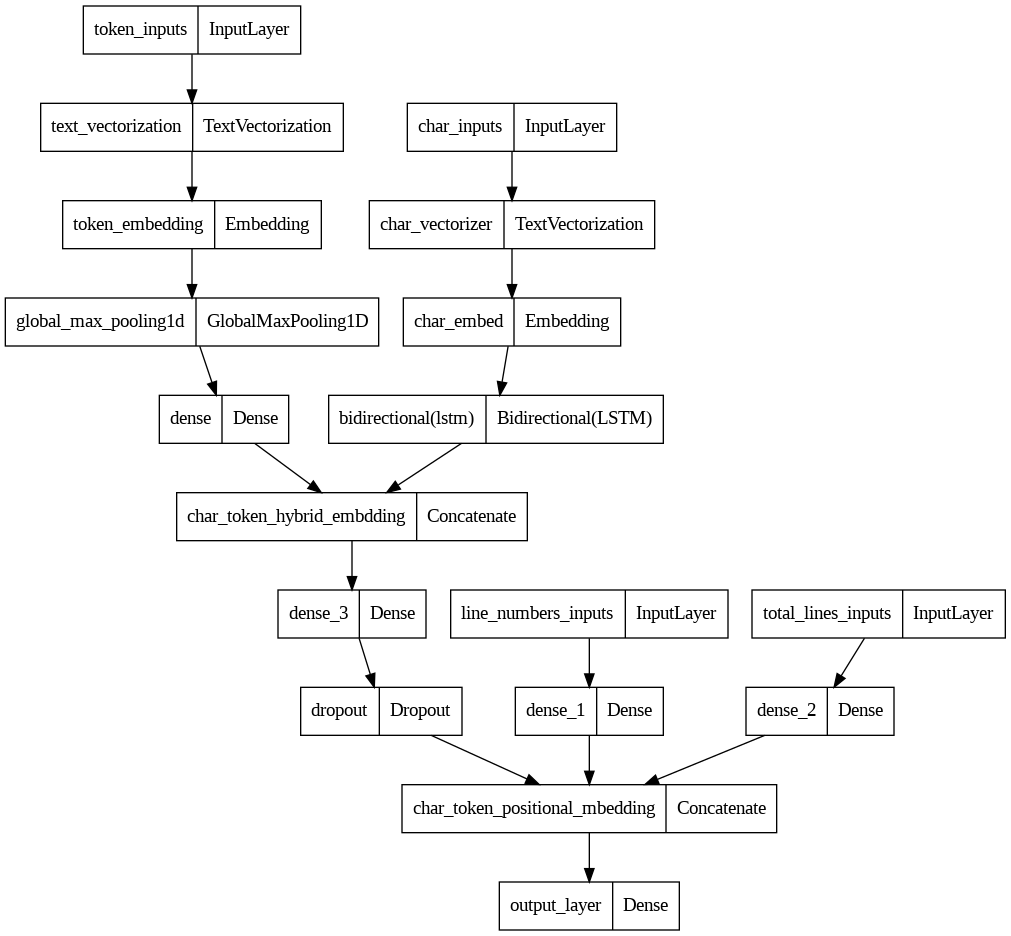

In [54]:
from tensorflow.keras.utils import plot_model
plot_model(model_6)

In [55]:
train_char_token_pos_data=tf.data.Dataset.from_tensor_slices((train_line_number_one_hot,
                                                              train_total_lines_one_hot,
                                                              train_sentences,
                                                              train_chars))
train_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset=tf.data.Dataset.zip((train_char_token_pos_data,
                                                  train_char_token_pos_labels))
train_char_token_pos_dataset=train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_pos_data=tf.data.Dataset.from_tensor_slices((val_line_number_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset=tf.data.Dataset.zip((val_char_token_pos_data,
                                                  val_char_token_pos_labels))
val_char_token_pos_dataset=val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [56]:
history_model_6=model_6.fit(train_char_token_pos_dataset,
                            steps_per_epoch=int(0.01*len(train_char_token_pos_dataset)),
                            epochs=3,
                            validation_data=val_char_token_pos_dataset,
                            validation_steps=int(0.01*len(val_char_token_pos_dataset)),
                            )

Epoch 1/3
56/56 [==============================] - 23s 170ms/step - loss: 1.5006 - accuracy: 0.3990 - val_loss: 1.4504 - val_accuracy: 0.4931
Epoch 2/3
56/56 [==============================] - 5s 91ms/step - loss: 1.3547 - accuracy: 0.5106 - val_loss: 1.2700 - val_accuracy: 0.5660
Epoch 3/3
56/56 [==============================] - 4s 66ms/step - loss: 1.2115 - accuracy: 0.6724 - val_loss: 1.1298 - val_accuracy: 0.7014


In [57]:
model_6_pred_probs=model_6.predict(val_char_token_pos_dataset,verbose=1)
model_6_pred_probs

945/945 [==============================] - 14s 12ms/step


array([[0.3390296 , 0.22337987, 0.12638277, 0.22213413, 0.08907364],
       [0.4170593 , 0.26002616, 0.07614996, 0.17984934, 0.06691529],
       [0.29821742, 0.2110759 , 0.25704554, 0.15724422, 0.07641692],
       ...,
       [0.04838086, 0.05800197, 0.10905625, 0.05514309, 0.72941786],
       [0.07997641, 0.11984278, 0.53162605, 0.07727212, 0.19128262],
       [0.37861285, 0.25668547, 0.12230866, 0.13481829, 0.10757477]],
      dtype=float32)

In [58]:
model_6_preds=tf.argmax(model_6_pred_probs,axis=1)
model_6_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 2, 0])>

In [59]:
model_6_results=calculate_results(y_pred=model_6_preds,
                                  y_true=val_labels_encoded)
model_6_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 71.68012710181385,
 'precision': 0.6891498097518083,
 'recall': 0.7168012710181385,
 'f1': 0.6881260535330737}

In [60]:
tf.keras.models.save_model
model_6.save("medicalReportCreator")

In [61]:
loaded_model =tf.keras.models.load_model("medicalReportCreator")

In [62]:
# def preprocess_text_with_line_numbers(text):
#     # Split the input text into lines
#     input_lines = text.split(". ")
#     abstract_samples = []

#     for abstract_line_number, line in enumerate(input_lines):
#         line_data = {}
#         line_data["text"] = line.lower()
#         line_data["line_number"] = abstract_line_number
#         line_data["total_lines"] = len(input_lines)
#         abstract_samples.append(line_data)

#     return abstract_samples
# # Sample sentences
# para = "Minimally invasive endovascular aneurysm repair ( EVAR ) could be a surgical technique that improves outcome of patients with ruptured abdominal aortic aneurysm ( rAAA ) . The aim of this study was to analyse the cost-effectiveness and cost-utility of EVAR compared with standard open repair ( OR ) in the treatment of rAAA , with costs per @-day and @-month survivor as outcome parameters . Resource use was determined from the Amsterdam Acute Aneurysm ( AJAX ) trial , a multicentre randomized trial comparing EVAR with OR in patients with rAAA . The analysis was performed from a provider perspective . All costs were calculated as if all patients had been treated in the same hospital ( Onze Lieve Vrouwe Gasthuis , teaching hospital ) . A total of @ patients were randomized . The @-day mortality rate was @ per cent after EVAR and @ per cent for OR : absolute risk reduction ( ARR ) @ ( @ per cent confidence interval ( c.i. ) -@ to @ ) per cent . At @months , the total mortality rate for EVAR was @ per cent , compared with @ per cent among those assigned to OR : ARR @ ( -@ to @ ) per cent . The mean cost difference between EVAR and OR was @ ( @ per cent c.i. -@ to @,@ ) at @days and @,@ ( -@ to @,@ ) at @months . The incremental cost-effectiveness ratio per prevented death was @,@ at @days and @,@ at @months . There was no significant difference in quality of life between EVAR and OR . Nor was EVAR superior regarding cost-utility . EVAR may be more effective for rAAA , but its increased costs mean that it is unaffordable based on current standards of societal willingness-to-pay for health gains ."

# pre_prara=preprocess_text_with_line_numbers(para)
# pre_prara
# np.array([para])
# pre_para=pd.DataFrame(pre_prara)
# pre_para
# pre_para_list=pre_para["text"].tolist()

In [63]:
def preprocess_text_with_line_numbers(text):
    # Split the input text into lines
    input_lines = text.split(". ")
    abstract_samples = []

    for abstract_line_number, line in enumerate(input_lines):
        line_data = {}
        line_data["text"] = line.lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(input_lines)
        abstract_samples.append(line_data)

    return abstract_samples


In [64]:
# Sample sentences
para = "Minimally invasive endovascular aneurysm repair ( EVAR ) could be a surgical technique that improves outcome of patients with ruptured abdominal aortic aneurysm ( rAAA ) . The aim of this study was to analyse the cost-effectiveness and cost-utility of EVAR compared with standard open repair ( OR ) in the treatment of rAAA , with costs per @-day and @-month survivor as outcome parameters . Resource use was determined from the Amsterdam Acute Aneurysm ( AJAX ) trial , a multicentre randomized trial comparing EVAR with OR in patients with rAAA . The analysis was performed from a provider perspective . All costs were calculated as if all patients had been treated in the same hospital ( Onze Lieve Vrouwe Gasthuis , teaching hospital ) . A total of @ patients were randomized . The @-day mortality rate was @ per cent after EVAR and @ per cent for OR : absolute risk reduction ( ARR ) @ ( @ per cent confidence interval ( c.i. ) -@ to @ ) per cent . At @months , the total mortality rate for EVAR was @ per cent , compared with @ per cent among those assigned to OR : ARR @ ( -@ to @ ) per cent . The mean cost difference between EVAR and OR was @ ( @ per cent c.i. -@ to @,@ ) at @days and @,@ ( -@ to @,@ ) at @months . The incremental cost-effectiveness ratio per prevented death was @,@ at @days and @,@ at @months . There was no significant difference in quality of life between EVAR and OR . Nor was EVAR superior regarding cost-utility . EVAR may be more effective for rAAA , but its increased costs mean that it is unaffordable based on current standards of societal willingness-to-pay for health gains ."

pre_prara=preprocess_text_with_line_numbers(para)
pre_prara


[{'text': 'minimally invasive endovascular aneurysm repair ( evar ) could be a surgical technique that improves outcome of patients with ruptured abdominal aortic aneurysm ( raaa ) ',
  'line_number': 0,
  'total_lines': 15},
 {'text': 'the aim of this study was to analyse the cost-effectiveness and cost-utility of evar compared with standard open repair ( or ) in the treatment of raaa , with costs per @-day and @-month survivor as outcome parameters ',
  'line_number': 1,
  'total_lines': 15},
 {'text': 'resource use was determined from the amsterdam acute aneurysm ( ajax ) trial , a multicentre randomized trial comparing evar with or in patients with raaa ',
  'line_number': 2,
  'total_lines': 15},
 {'text': 'the analysis was performed from a provider perspective ',
  'line_number': 3,
  'total_lines': 15},
 {'text': 'all costs were calculated as if all patients had been treated in the same hospital ( onze lieve vrouwe gasthuis , teaching hospital ) ',
  'line_number': 4,
  'total_l

In [65]:
np.array([para])


array(['Minimally invasive endovascular aneurysm repair ( EVAR ) could be a surgical technique that improves outcome of patients with ruptured abdominal aortic aneurysm ( rAAA ) . The aim of this study was to analyse the cost-effectiveness and cost-utility of EVAR compared with standard open repair ( OR ) in the treatment of rAAA , with costs per @-day and @-month survivor as outcome parameters . Resource use was determined from the Amsterdam Acute Aneurysm ( AJAX ) trial , a multicentre randomized trial comparing EVAR with OR in patients with rAAA . The analysis was performed from a provider perspective . All costs were calculated as if all patients had been treated in the same hospital ( Onze Lieve Vrouwe Gasthuis , teaching hospital ) . A total of @ patients were randomized . The @-day mortality rate was @ per cent after EVAR and @ per cent for OR : absolute risk reduction ( ARR ) @ ( @ per cent confidence interval ( c.i. ) -@ to @ ) per cent . At @months , the total mortality rate 

In [66]:
pre_para=pd.DataFrame(pre_prara)
pre_para
pre_para_list=pre_para["text"].tolist()

In [67]:
pre_para_list=pre_para["text"].tolist()

In [68]:
len(pre_para_list)

15

In [69]:
for i,sentence in enumerate(pre_para_list):
  print(f"line_number: {i} , sentence: {sentence}")

line_number: 0 , sentence: minimally invasive endovascular aneurysm repair ( evar ) could be a surgical technique that improves outcome of patients with ruptured abdominal aortic aneurysm ( raaa ) 
line_number: 1 , sentence: the aim of this study was to analyse the cost-effectiveness and cost-utility of evar compared with standard open repair ( or ) in the treatment of raaa , with costs per @-day and @-month survivor as outcome parameters 
line_number: 2 , sentence: resource use was determined from the amsterdam acute aneurysm ( ajax ) trial , a multicentre randomized trial comparing evar with or in patients with raaa 
line_number: 3 , sentence: the analysis was performed from a provider perspective 
line_number: 4 , sentence: all costs were calculated as if all patients had been treated in the same hospital ( onze lieve vrouwe gasthuis , teaching hospital ) 
line_number: 5 , sentence: a total of @ patients were randomized 
line_number: 6 , sentence: the @-day mortality rate was @ per 

In [70]:
model_6.inputs

[<KerasTensor: shape=(None, 15) dtype=float32 (created by layer 'line_numbers_inputs')>,
 <KerasTensor: shape=(None, 20) dtype=float32 (created by layer 'total_lines_inputs')>,
 <KerasTensor: shape=(None,) dtype=string (created by layer 'token_inputs')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'char_inputs')>]

In [86]:
!cp -r /content/medicalReportCreator /content/drive/MyDrive

In [88]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/medicalReportCreator")

In [106]:
import pandas as pd
import tensorflow as tf
from keras.models import load_model

# Load the model
model_6 = load_model("/content/drive/MyDrive/medicalReportCreator")

def preprocess_text_with_line_numbers(text):
    # Split the input text into lines
    input_lines = text.split(". ")
    abstract_samples = []

    for abstract_line_number, line in enumerate(input_lines):
        line_data = {}
        line_data["text"] = line.lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(input_lines)
        abstract_samples.append(line_data)

    return abstract_samples

para = "Your input paragraph here"

# Preprocess the text
preprocessed_data = preprocess_text_with_line_numbers(para)

# Create DataFrame from preprocessed data
v_df = pd.DataFrame(preprocessed_data)

v_sentences = v_df["text"].tolist()
v_line_number_one_hot = tf.one_hot(v_df["line_number"].to_numpy(), depth=15)
v_total_lines_one_hot = tf.one_hot(v_df["total_lines"].to_numpy(), depth=20)

def split_chars(text):
    return " ".join(list(text))

v_chars = [split_chars(sentence) for sentence in v_sentences]

# Print shapes for debugging
print(v_line_number_one_hot.shape)
print(v_total_lines_one_hot.shape)
print(len(v_sentences))
print(len(v_chars))

# Create the dataset
v_char_token_pos_data = tf.data.Dataset.from_tensor_slices((v_line_number_one_hot,
                                                             v_total_lines_one_hot,
                                                             v_sentences,
                                                             v_chars))

# Batch and prefetch the dataset
v_char_token_pos_dataset = v_char_token_pos_data.batch(32).prefetch(tf.data.AUTOTUNE)

# Predict probabilities
model_6_pred_probs = model_6.predict(v_char_token_pos_dataset, verbose=1)
print(model_6_pred_probs)


(1, 15)
(1, 20)
1
1


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2380, in predict_step
        x, _, _ = data_adapter.unpack_x_y_sample_weight(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 1883, in unpack_x_y_sample_weight
        raise ValueError(error_msg)

    ValueError: Data is expected to be in format `x`, `(x,)`, `(x, y)`, or `(x, y, sample_weight)`, found: (<tf.Tensor 'IteratorGetNext:0' shape=(None, 15) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 20) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None,) dtype=string>, <tf.Tensor 'IteratorGetNext:3' shape=(None,) dtype=string>)


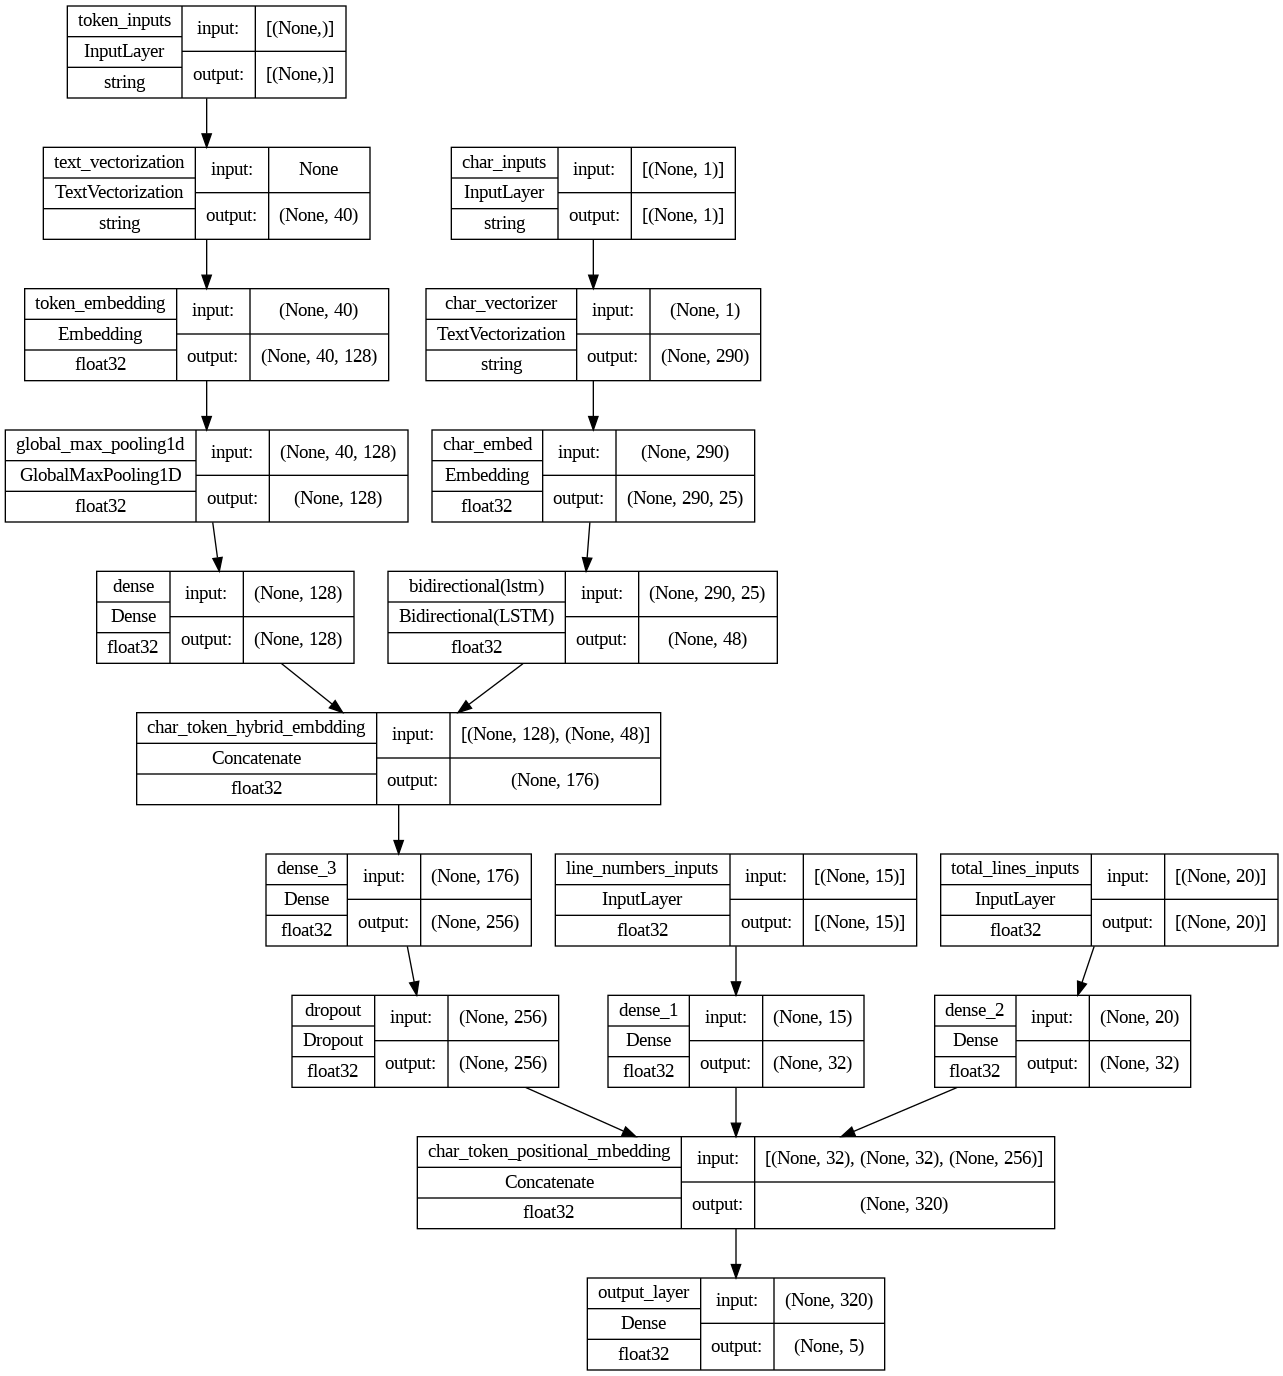

In [107]:
plot_model(model,to_file='model.png',show_shapes=True,show_dtype=True)

In [ ]:
import pandas as pd
import tensorflow as tf

def get_lines(filename):
  with open(filename, 'r') as f:
    return f.readlines()


def preprocess_text_with_line_numbers(text):
    # Split the input text into lines
    input_lines = text.split(". ")
    abstract_samples = []

    for abstract_line_number, line in enumerate(input_lines):
        line_data = {}
        line_data["text"] = line.lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(input_lines)
        abstract_samples.append(line_data)

    return abstract_samples

data_dir=""
para = "Minimally invasive endovascular aneurysm repair ( EVAR ) could be a surgical technique that improves outcome of patients with ruptured abdominal aortic aneurysm ( rAAA ) . The aim of this study was to analyse the cost-effectiveness and cost-utility of EVAR compared with standard open repair ( OR ) in the treatment of rAAA , with costs per @-day and @-month survivor as outcome parameters . Resource use was determined from the Amsterdam Acute Aneurysm ( AJAX ) trial , a multicentre randomized trial comparing EVAR with OR in patients with rAAA . The analysis was performed from a provider perspective . All costs were calculated as if all patients had been treated in the same hospital ( Onze Lieve Vrouwe Gasthuis , teaching hospital ) . A total of @ patients were randomized . The @-day mortality rate was @ per cent after EVAR and @ per cent for OR : absolute risk reduction ( ARR ) @ ( @ per cent confidence interval ( c.i. ) -@ to @ ) per cent . At @months , the total mortality rate for EVAR was @ per cent , compared with @ per cent among those assigned to OR : ARR @ ( -@ to @ ) per cent . The mean cost difference between EVAR and OR was @ ( @ per cent c.i. -@ to @,@ ) at @days and @,@ ( -@ to @,@ ) at @months . The incremental cost-effectiveness ratio per prevented death was @,@ at @days and @,@ at @months . There was no significant difference in quality of life between EVAR and OR . Nor was EVAR superior regarding cost-utility . EVAR may be more effective for rAAA , but its increased costs mean that it is unaffordable based on current standards of societal willingness-to-pay for health gains ."

# val_samples=preprocess_text_with_line_numbers(data_dir+"dev.txt")

v_df=pd.DataFrame(para)

v_sentences=v_df["text"].tolist()


v_line_number_one_hot=tf.one_hot(v_df["line_number"].to_numpy(),depth=15)
v_total_lines_one_hot=tf.one_hot(v_df["total_lines"].to_numpy(),depth=20)

def split_chars(text):
  return " ".join(list(text))

v_chars=[split_chars(sentence) for sentence in v_sentences]


v_char_token_pos_data=tf.data.Dataset.from_tensor_slices((v_line_number_one_hot,
                                                              v_total_lines_one_hot,
                                                              v_sentences,
                                                              v_chars))
v_char_token=v_char_token_pos_data.batch(32).prefetch(tf.data.AUTOTUNE)
pred = model_6.predict(v_char_token)

In [ ]:
# train_char_token_pos_data=tf.data.Dataset.from_tensor_slices((train_line_number_one_hot,
#                                                               train_total_lines_one_hot,
#                                                               train_sentences,
#                                                               train_chars))
# train_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
# train_char_token_pos_dataset=tf.data.Dataset.zip((train_char_token_pos_data,
#                                                   train_char_token_pos_labels))
# train_char_token_pos_dataset=train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# val_char_token_pos_data=tf.data.Dataset.from_tensor_slices((val_line_number_one_hot,
#                                                               val_total_lines_one_hot,
#                                                               val_sentences,
#                                                               val_chars))
# val_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
# val_char_token_pos_dataset=tf.data.Dataset.zip((val_char_token_pos_data,
#                                                   val_char_token_pos_labels))
# val_char_token_pos_dataset=val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
# model_7.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["accuracy"])

In [ ]:
# history_model_7=model_7.fit(train_char_token_pos_dataset,
#                             epochs=3,
#                             validation_data=val_char_token_pos_dataset
#                             )

In [ ]:
# model_7_pred_probs=model_7.predict(val_char_token_pos_dataset,verbose=1)
# model_7_pred_probs

In [ ]:
# model_7_preds=tf.argmax(model_7_pred_probs,axis=1)
# model_7_preds

In [ ]:
# model_7_results=calculate_results(y_pred=model_7_preds,
#                                   y_true=val_labels_encoded)
# model_7_results